In [39]:
from data_service import get_sales_depart_billboard,get_index_daily
from scr.plotting import plot_indicator
import pandas as pd
import numpy as np
from scr.tushare_api import TuShare
from scr import HMA
my_ts = TuShare()

In [3]:
# 数据获取
billboard_df: pd.DataFrame = get_sales_depart_billboard(
    '2013-01-01', '2021-12-31')

# 数据储存
billboard_df.to_csv('../data/billboard.csv', encoding='utf-8')

机构龙虎榜数据获取:   0%|          | 0/2188 [00:00<?, ?it/s]

In [59]:
# 读取本地文件
billboard_df: pd.DataFrame = pd.read_csv('../data/billboard.csv',
                                         encoding='utf-8',
                                         index_col=[0],
                                         parse_dates=['trade_date'])

In [65]:
df.query('side=="0"')['buy'].sum()

342600040.37

In [67]:
df.query('exalter == "中信建投证券股份有限公司淄博市中心路证券营业部"')

,trade_date,ts_code,exalter,buy,buy_rate,sell,sell_rate,net_buy,side,reason
378,20130104,600882.SH,中信建投证券股份有限公司淄博市中心路证券营业部,15069249.32,NaN,NaN,1.95,-15069249.32,1,连续三个交易日内，涨幅偏离值累计达20%的证券


In [24]:
df = my_ts.top_inst(trade_date='20130104')
pivot_table= pd.pivot_table(df,index='trade_date',columns='side',values=['buy','sell'])

In [68]:
def calc_netbuy(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    dtype_mapping = {'trade_date':np.datetime64,'side':np.int0,'buy':np.float64,'sell':np.float64}
    df = (df.pipe(pd.DataFrame.astype,dtype_mapping))
    buy:pd.Series = df.query('side==0').groupby('trade_date')['sell'].sum()
    sell:pd.Series = df.query('side==1').groupby('trade_date')['buy'].sum()

    return buy-sell


In [90]:
df.query('exalter == "中国国际金融有限公司上海淮海中路证券营业部"')

,trade_date,ts_code,exalter,buy,buy_rate,sell,sell_rate,net_buy,side,reason
0,20130104,000043.SZ,中国国际金融有限公司上海淮海中路证券营业部,16970815.06,1.19,16377628.0,1.24,-593187.06,0,连续三个交易日内，涨幅偏离值累计达20%的证券
1,20130104,000043.SZ,中国国际金融有限公司上海淮海中路证券营业部,16970815.06,1.19,16377628.0,1.24,-593187.06,1,连续三个交易日内，涨幅偏离值累计达20%的证券
30,20130104,000417.SZ,中国国际金融有限公司上海淮海中路证券营业部,7545992.81,0.03,68505.0,3.19,-7477487.81,1,涨幅偏离值达7%的证券
51,20130104,000750.SZ,中国国际金融有限公司上海淮海中路证券营业部,8315067.11,0.01,83441.0,0.66,-8231626.11,1,换手率达20%的证券
90,20130104,001914.SZ,中国国际金融有限公司上海淮海中路证券营业部,16970815.06,1.19,16377628.0,1.24,-593187.06,0,连续三个交易日内，涨幅偏离值累计达20%的证券
91,20130104,001914.SZ,中国国际金融有限公司上海淮海中路证券营业部,16970815.06,1.19,16377628.0,1.24,-593187.06,1,连续三个交易日内，涨幅偏离值累计达20%的证券
202,20130104,002694.SZ,中国国际金融有限公司上海淮海中路证券营业部,5050700.90,0.00,0.0,2.73,-5050700.90,1,换手率达20%的证券
281,20130104,300295.SZ,中国国际金融有限公司上海淮海中路证券营业部,1437878.98,6.44,10873468.0,0.85,9435589.02,0,涨幅偏离值达7%的证券
341,20130104,600535.SH,中国国际金融有限公司上海淮海中路证券营业部,NaN,2.60,11227557.8,NaN,11227557.80,0,跌幅偏离值达7%的证券


In [93]:
df['sell'].sum() - df['buy'].sum()

-531496398.0100002

In [95]:
df['sell'].sum(),df['buy'].sum()

(2162417111.66, 2693913509.67)

In [3]:
# 获取沪深300数据
hs300:pd.DataFrame = get_index_daily(code='000300.SH',start_date = '20130101',end_date='20211231')

In [4]:
hs300.head()

,code,close,open,high,low,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2013-01-04,000300.SH,2524.409,2551.814,2558.529,2498.892,2522.952,1.457,0.0577,97988182.0,9.557925e+07
2013-01-07,000300.SH,2535.985,2518.047,2545.969,2511.603,2524.409,11.576,0.4586,75167993.0,7.316751e+07
2013-01-08,000300.SH,2525.330,2534.647,2540.513,2502.490,2535.985,-10.655,-0.4202,71837100.0,7.649806e+07
2013-01-09,000300.SH,2526.126,2518.104,2534.239,2504.299,2525.330,0.796,0.0315,70231170.0,7.423360e+07
2013-01-10,000300.SH,2530.569,2525.590,2553.352,2513.729,2526.126,4.443,0.1759,71085862.0,7.115905e+07


In [84]:
nextbuy

trade_date
2013-01-04   -4.785893e+08
2013-01-07   -9.755158e+07
2013-01-08    6.353716e+07
2013-01-09   -1.630939e+08
2013-01-10    3.154391e+08
                  ...     
2021-12-27   -1.874114e+08
2021-12-28    1.124862e+09
2021-12-29   -8.001961e+08
2021-12-30    3.396985e+08
2021-12-31    4.182978e+08
Length: 2186, dtype: float64

<AxesSubplot:xlabel='trade_date'>

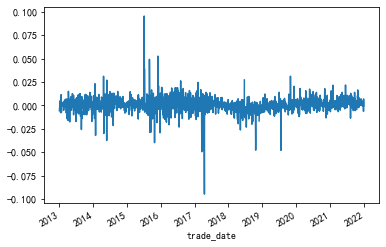

In [100]:
(billboard_df.groupby('trade_date')['net_buy'].sum() / (hs300['amount'] * 1000)).plot()

In [101]:
# 计算当日所有单个席位净流入金额(单个席位买入 金额-单个席位卖出金额)的总和
nextbuy: pd.Series = billboard_df.groupby('trade_date')['net_buy'].sum()

# IS_NetBuy/沪深 300 指数当日成交金额
is_netbuy_s: pd.Series = nextbuy / (hs300['amount'] * 1000)
is_netbuy_s: pd.Series = is_netbuy_s.dropna()

<AxesSubplot:xlabel='trade_date'>

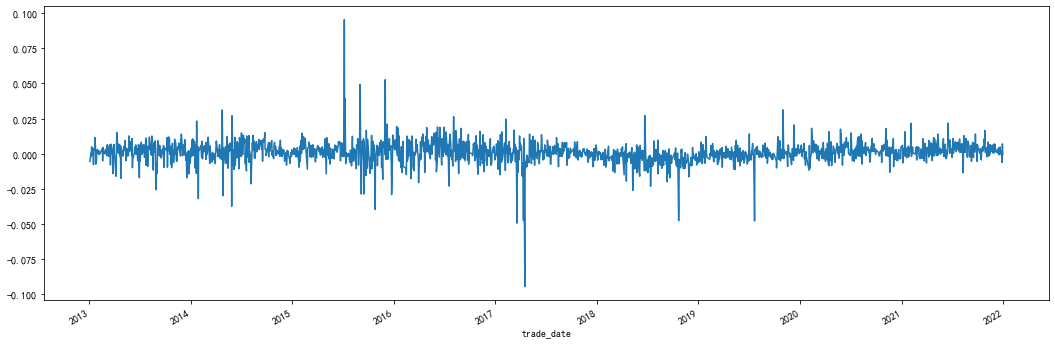

In [111]:
is_netbuy_s.plot(figsize=(18,6))

In [127]:
nextbuy

trade_date
2013-01-04   -5.314964e+08
2013-01-07   -1.263456e+08
2013-01-08    2.923371e+07
2013-01-09   -1.535441e+08
2013-01-10    3.482368e+08
                  ...     
2021-12-27   -4.572104e+08
2021-12-28   -1.721853e+09
2021-12-29    1.904829e+09
2021-12-30    1.700922e+08
2021-12-31   -1.263721e+08
Name: net_buy, Length: 2186, dtype: float64

In [136]:
jq_data = pd.read_csv(r'D:\Downloads\billboard_frame.csv',index_col=[0],parse_dates=['day'])
COND:pd.Series = jq_data['sales_depart_name'].isna()
filter_df = jq_data[~COND].copy()

In [122]:
jq_data.head()

,code,day,direction,rank,abnormal_code,abnormal_name,sales_depart_name,buy_value,buy_rate,sell_value,sell_rate,total_value,net_value,amount
0,600630.XSHG,2013-12-31,BUY,3,106001,涨幅偏离值达7%的证券,中国银河证券股份有限公司宁波翠柏路证券营业部,13096847.48,0.0373,NaN,NaN,NaN,NaN,351084384.0
1,600630.XSHG,2013-12-31,SELL,4,106001,涨幅偏离值达7%的证券,中国中投证券有限责任公司上海灵石路证券营业部,NaN,NaN,3937517.00,0.0112,NaN,NaN,351084384.0
2,600630.XSHG,2013-12-31,SELL,3,106001,涨幅偏离值达7%的证券,国信证券股份有限公司上海北京东路证券营业部,NaN,NaN,4137676.52,0.0118,NaN,NaN,351084384.0
3,600630.XSHG,2013-12-31,SELL,5,106001,涨幅偏离值达7%的证券,光大证券股份有限公司长春解放大路证券营业部,NaN,NaN,3734168.00,0.0106,NaN,NaN,351084384.0
4,600630.XSHG,2013-12-31,BUY,5,106001,涨幅偏离值达7%的证券,中国中投证券有限责任公司杭州环球中心证券营业部,9380000.00,0.0267,NaN,NaN,NaN,NaN,351084384.0


In [137]:
group_ser = filter_df.groupby('day')['buy_value'].sum() - filter_df.groupby('day')['sell_value'].sum()
group_ser

day
2013-01-04   -5.440097e+08
2013-01-07   -1.263456e+08
2013-01-08    2.923370e+07
2013-01-09   -1.533919e+08
2013-01-10    3.482339e+08
                  ...     
2021-12-27   -4.260396e+08
2021-12-28   -2.896929e+08
2021-12-29    1.901745e+09
2021-12-30    2.481528e+08
2021-12-31   -2.100001e+08
Length: 2188, dtype: float64

<AxesSubplot:>

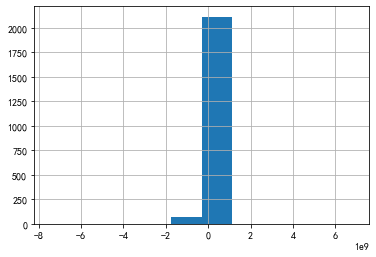

In [143]:
(group_ser - nextbuy).hist()

In [103]:
# 计算HMA信号
is_netbuy_s_s:pd.Series = HMA(is_netbuy_s,30).dropna()
is_netbuy_s_l:pd.Series = HMA(is_netbuy_s,100).dropna()

In [104]:
# 数据对齐
netbuy_s_s,netbuy_s_l = is_netbuy_s_l.align(is_netbuy_s_s,join='left',axis=0)

In [105]:
indincator:pd.DataFrame = pd.concat((netbuy_s_s,netbuy_s_l),axis=1)
indincator.columns = ['fast','slow']

GridSpec(3, 1)

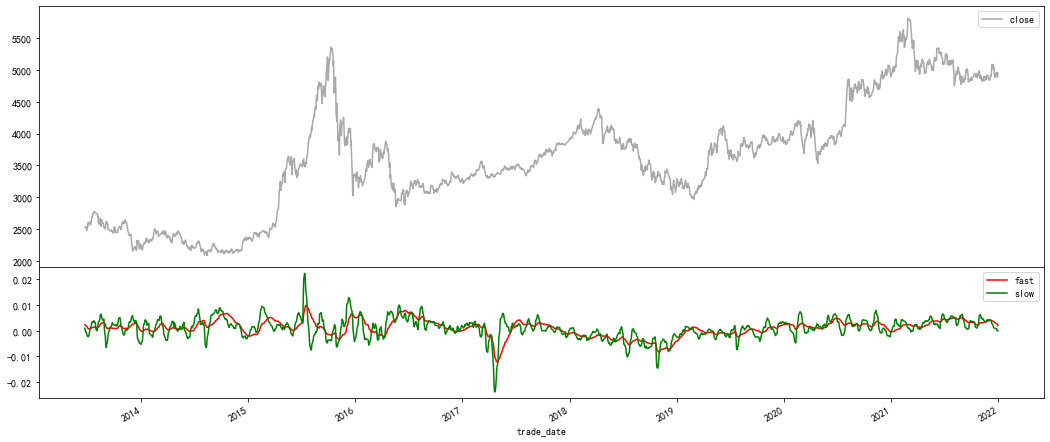

In [106]:
plot_indicator(hs300['close'],indincator)

In [107]:
import empyrical as ep

In [108]:
buy1 = (netbuy_s_s > netbuy_s_l) & (netbuy_s_s > 0) & (netbuy_s_l > 0)
buy2 = (netbuy_s_s < netbuy_s_l) & (netbuy_s_s < 0) & (netbuy_s_l < 0)

buy = buy1|buy2

sell1 = (netbuy_s_s > netbuy_s_l) & (netbuy_s_s > 0) & (netbuy_s_l < 0)
sell2 = (netbuy_s_s < netbuy_s_l) & (netbuy_s_s < 0) & (netbuy_s_l > 0)

sell = sell1 | sell2

In [114]:
hold = pd.Series(index=sell.index)
previous = 0
i = 0
for b,s in zip(buy,sell):
    
    if b:
        
        hold.iloc[i] = 1
        previous = 1
    elif s:
        
        hold.iloc[i] = 0
        previous = 0
    else:    
        
        hold.iloc[i] = previous
        
    i+=1

<ipython-input-114-3cd5c261565a>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hold = pd.Series(index=sell.index)


<AxesSubplot:xlabel='trade_date'>

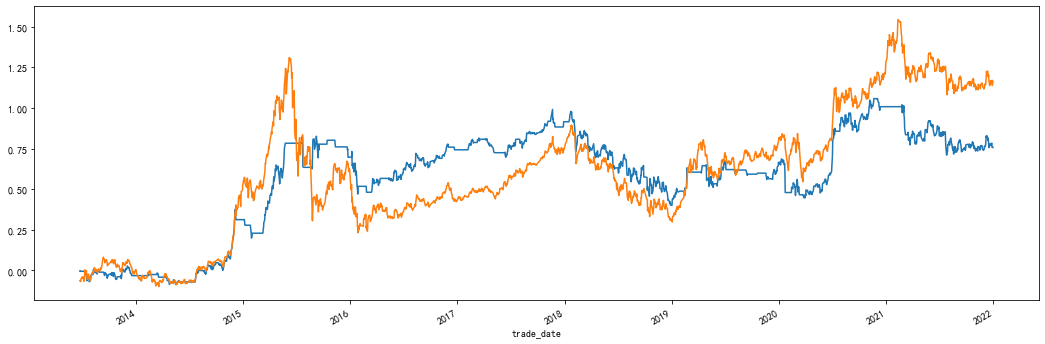

In [116]:
pct_ser = hs300['close'].pct_change()
next_ser = pct_ser.shift(-1)

pct_ser = pct_ser.reindex(buy.index)
next_ser = next_ser.reindex(buy.index)

ep.cum_returns(next_ser*hold).plot(figsize=(18,6))
ep.cum_returns(pct_ser).plot()

# 回测

In [9]:
from scr.bt_func import (ma_cross,get_backtesting,analysis_rets,analysis_trade)

In [10]:
bt_data:pd.DataFrame = hs300[['close','open','high','low','vol']].copy()
bt_data.rename(columns={'vol':'volume'},inplace=True)
bt_data['openinterest'] = 0
bt_data = pd.concat((bt_data,indincator),axis=1).dropna()

In [11]:
bt_data.head()

,close,open,high,low,volume,openinterest,fast,slow
trade_date,,,,,,,,
2013-06-24,2171.210,2308.069,2308.069,2164.325,86597259.0,0,-2.664770,-0.898103
2013-06-25,2165.421,2146.053,2169.211,2023.171,107554882.0,0,-2.611303,-0.353108
2013-06-26,2168.297,2170.326,2181.021,2131.860,79256426.0,0,-2.570178,-0.006576
2013-06-27,2160.735,2172.848,2200.213,2153.175,75406753.0,0,-2.479063,0.501238
2013-06-28,2200.639,2149.030,2227.461,2139.372,79451327.0,0,-2.455094,0.457030


In [12]:
bt_result = get_backtesting(bt_data,'hs300',ma_cross)

2013-06-25,BUY EXECUTED,ref:1,Price:2146.2676,Size:41.00,Cost:87996.9718,Comm 0.0000,Stock:hs300
2013-06-26,SELL EXECUTED,ref:2,Price:2170.1090,Size:-41.00,Cost:87996.9718,Comm 0.0000,Stock:hs300
2013-06-27,BUY EXECUTED,ref:3,Price:2173.0653,Size:41.00,Cost:89095.6767,Comm 0.0000,Stock:hs300
2013-06-28,SELL EXECUTED,ref:4,Price:2148.8151,Size:-41.00,Cost:89095.6767,Comm 0.0000,Stock:hs300
2013-07-12,BUY EXECUTED,ref:5,Price:2319.2549,Size:38.00,Cost:88131.6863,Comm 0.0000,Stock:hs300
2013-07-15,SELL EXECUTED,ref:6,Price:2289.5330,Size:-38.00,Cost:88131.6863,Comm 0.0000,Stock:hs300
2013-08-01,BUY EXECUTED,ref:7,Price:2206.2246,Size:40.00,Cost:88248.9840,Comm 0.0000,Stock:hs300
2013-08-02,SELL EXECUTED,ref:8,Price:2263.2687,Size:-40.00,Cost:88248.9840,Comm 0.0000,Stock:hs300
2013-08-05,BUY EXECUTED,ref:9,Price:2250.2010,Size:40.00,Cost:90008.0399,Comm 0.0000,Stock:hs300
2013-08-06,SELL EXECUTED,ref:10,Price:2270.4449,Size:-40.00,Cost:90008.0399,Comm 0.0000,Stock:hs300
2013-08-07,BUY EXEC

,年化收益率,累计收益,波动率,夏普,最大回撤,索提诺比率,Calmar
策略,-4.98%,-34.38%,8.19%,-58.24%,-44.88%,-77.34%,-11.10%
基准,10.48%,127.54%,22.88%,55.12%,-46.70%,75.96%,22.45%


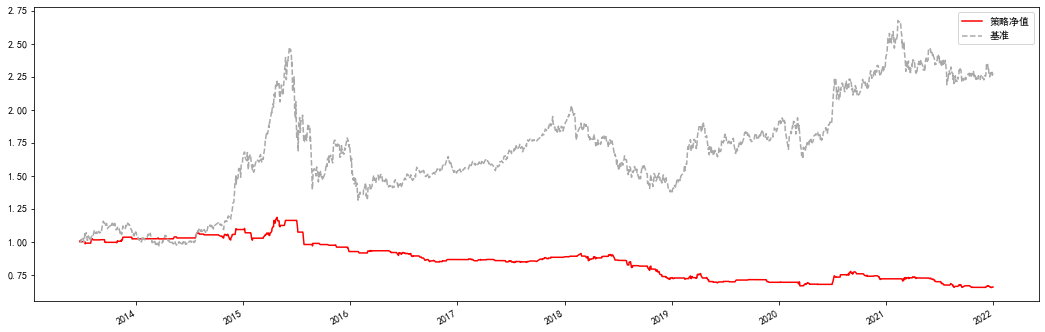

In [13]:
analysis_rets(bt_data['close'],bt_result.result)

Res(result=[<scr.bt_func.ma_cross object at 0x000001F16144CA90>], cerebro=<backtrader.cerebro.Cerebro object at 0x000001F1643A47F0>)